In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
oecd_bli = pd.read_csv("data/oecd_bli_2015.csv", thousands=',')
oecd_bli.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN


In [3]:
gdp_per_capita = pd.read_csv("data/gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1')
gdp_per_capita.head(2)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [26]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli.copy()
    gdp_per_capita = gdp_per_capita.copy()
    
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

country_stats.head(2)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6


In [5]:
X = country_stats[["GDP per capita"]]
y = country_stats["Life satisfaction"]

## CHART

Text(0.5, 1.0, 'Scatter Plot')

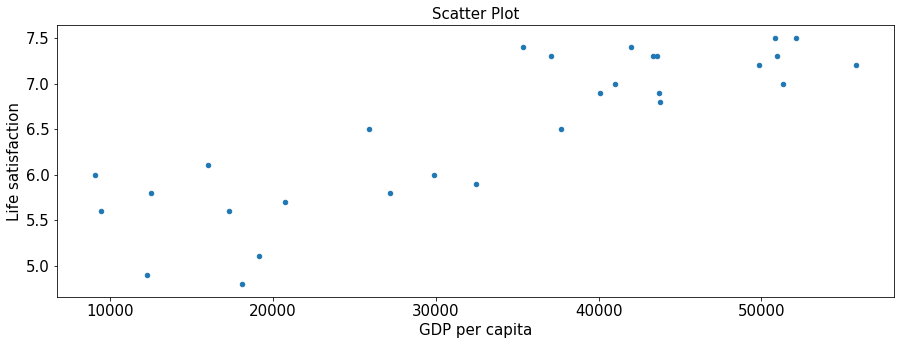

In [90]:
country_stats.plot(
    kind='scatter', 
    x="GDP per capita", 
    y='Life satisfaction', 
    figsize=(15,5), 
    fontsize=15,
)

plt.xlabel("GDP per capita", fontsize=15)
plt.ylabel("Life satisfaction", fontsize=15)
plt.title("Scatter Plot", fontsize=15)


## TRAIN TEST SPLIT


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)

 ## MODEL - LINEAR REGRESSION

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.3077003666233977

## PREDICTION

In [80]:
X_new = [[22587]]
model.predict(X_new)

array([5.93102315])

## MODEL - KNEIGHBORS REGRESSION

In [81]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
model.score(X_test,y_test)

-0.3307142857142844

## PREDICTION

In [75]:
X_new = [[22587]]
model.predict(X_new)

array([5.64])

In [10]:
A = pd.DataFrame({'A': [1, 4, 7, 10],"id":[1,2,3,4]})
A.set_index('id', inplace=True)

B = pd.DataFrame({'B': [9, 10, 2, 40],"id":[1,2,3,5]})
B.set_index('id', inplace=True)

c = pd.merge(A, B, left_index=True, right_index=True, how="right")
c.sort_values(by="B", ascending=False)

c.loc[[1,2,3]]

,A,B
id,,
1,1.0,9
2,4.0,10
3,7.0,2


## PREDICTION

In [43]:
X_new = [[22587]] 
model.predict(X_new)

array([5.93102315])